In [5]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import binom
df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [6]:
df.head()
x = df[['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']]
y = df[['default']]

In [7]:
num_buckets = 4
df['bucket'] = pd.cut(df['fico_score'], bins = num_buckets, labels = False)
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,bucket
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,1
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,1
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,1
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,2
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,2
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,1
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,1
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,2


Initial log-likelihood: -13.463435690611455


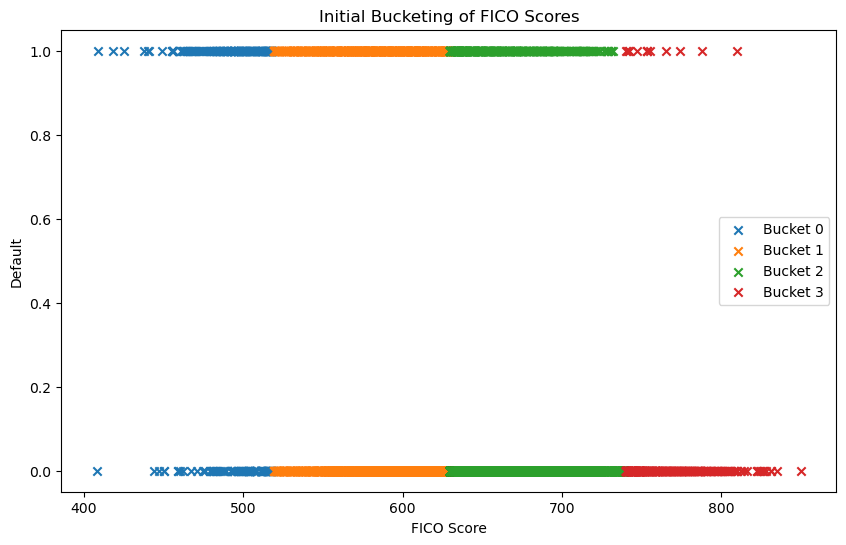

In [8]:

# Calculate the initial log-likelihood
def calculate_log_likelihood (data):
    log_likelihood = 0
    for b in range(num_buckets):
        bucket_data = df [df ['bucket'] == b]
        if not bucket_data.empty:
            ni=len (bucket_data)
            ki=bucket_data['default'].sum()
            pi=ki/ni if ni >0 else 0
            log_likelihood += binom.logpmf (ki, ni, pi) #Accumulate the log probability mass function 
    return log_likelihood 
#Return the sum of log likelihoods for all buckets
initial_log_likelihood = calculate_log_likelihood(df)

print (f"Initial log-likelihood: {initial_log_likelihood}")

# Plotting the initial bucketing 
plt.figure(figsize=(10, 6))
for b in range(num_buckets):
    bucket_data = df [df ['bucket'] == b]
    plt.scatter (bucket_data['fico_score'], bucket_data['default'], label = f'Bucket {b}', marker ='x')
plt.xlabel('FICO Score')
plt.ylabel('Default')
plt.legend()
plt.title('Initial Bucketing of FICO Scores')
plt.show()

In [16]:
def optmize_buckets(data, num_buckets, max_iterations = 100):
    boundaries = np.linspace(df['fico_score'].min(), df['fico_score'].max(), num_buckets+1)
    best_likelihood = calculate_log_likelihood(data)
    improved = True
    iteration = 0
    
    while improved and iteration<max_iterations:
        improved = False
        for i in range(1, len(boundaries)-1):
            original_boundary = boundaries[i]
            for shift in [-10, 10]:
                boundaries[i] += shift
                df['bucket'] = pd.cut(df['bucket'], bins=boundaries, labels= False, include_lowest=True)
                new_liklihood = calculate_log_likelihood(data)
                if new_liklihood > best_likelihood:
                    best_likelihood = new_liklihood
                    improved = True
                else:
                    boundaries[i] = original_boundary
            
        iteration += 1
        print(f"Iteration {iteration}, log-likelihood: {best_likelihood}")
    return boundaries

In [17]:
final_boundaires = optmize_buckets(df, num_buckets)
df['bucket'] = pd.cut(df['fico_score'], bins = final_boundaires, labels= False, include_lowest= True)
final_boundaires

Iteration 1, log-likelihood: 0
Iteration 2, log-likelihood: 0


array([408. , 518.5, 629. , 739.5, 850. ])

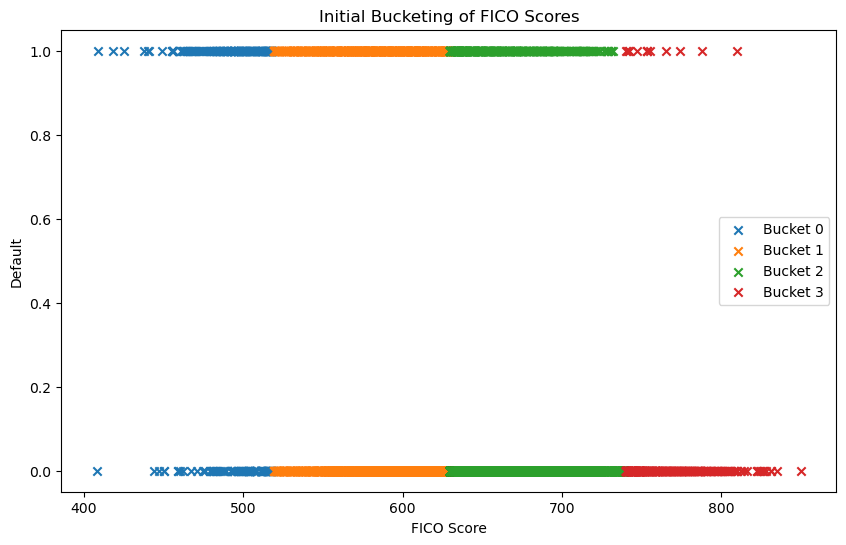

In [18]:
plt.figure(figsize=(10, 6))
for b in range(num_buckets):
    bucket_data = df [df ['bucket'] == b]
    plt.scatter (bucket_data['fico_score'], bucket_data['default'], label = f'Bucket {b}', marker ='x')
plt.xlabel('FICO Score')
plt.ylabel('Default')
plt.legend()
plt.title('Initial Bucketing of FICO Scores')
plt.show()